# Семинар 1: знакомство с PyTorch 🔥

## Вступление

В этом семинаре мы познакомимся с библиотекой **PyTorch**. Он очень похож на **NumPy**, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) — **PyTorch** может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях.

**План семинара**

1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**
2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций
3. Работаем с градиентами руками
4. Моя первая нейросеть

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import torchvision
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

### 1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [ ]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.13688569, 0.62792606, 0.63706243],
       [0.43484998, 0.03207177, 0.70577022],
       [0.76800963, 0.42572823, 0.35028935],
       [0.41527528, 0.06304275, 0.79059276],
       [0.87586625, 0.65810797, 0.04647338]])

In [ ]:
# размеры массива
a.shape

(5, 3)

In [ ]:
# сложение
a + 5

array([[5.28236451, 5.60059496, 5.97622053],
       [5.75568   , 5.47530952, 5.95535153],
       [5.99731934, 5.24099981, 5.17369252],
       [5.25855209, 5.58276536, 5.56838273],
       [5.04935771, 5.56138208, 5.30768761]])

In [ ]:
# матричное умножение
a @ a.T

array([[0.81887736, 0.52928313, 0.59561156, 0.60008837, 0.56274314],
       [0.52928313, 0.6882347 , 0.59484662, 0.74058116, 0.43477664],
       [0.59561156, 0.59484662, 0.89378595, 0.62271071, 0.96912799],
       [0.60008837, 0.74058116, 0.62271071, 0.80146485, 0.44195605],
       [0.56274314, 0.43477664, 0.96912799, 0.44195605, 1.20240756]])

In [ ]:
# среднее по колонкам
a.mean(axis=-1)

array([0.46729139, 0.39089732, 0.51467574, 0.42297026, 0.52681587])

In [ ]:
# решейп
a.reshape(1, 15).shape

(1, 15)

**Разминка**

При помощи **NumPy** посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [ ]:
# YOUR CODE
np.sum(np.arange(1,10001) ** 2)

333383335000

Аналогичные операции в **PyTorch** очень похожи, но иногда имеют немного другой синтаксис

In [ ]:
# случайный тензор
x = torch.rand(5, 3)
x

tensor([[0.5260, 0.9969, 0.2556],
        [0.0613, 0.1628, 0.7775],
        [0.5975, 0.4199, 0.6922],
        [0.9507, 0.6188, 0.3988],
        [0.9706, 0.4446, 0.5748]])

In [ ]:
# размеры тензора
x.shape

torch.Size([5, 3])

In [ ]:
# тоже размеры тензора
x.size()

torch.Size([5, 3])

In [ ]:
# сложение
x + 5

tensor([[5.5260, 5.9969, 5.2556],
        [5.0613, 5.1628, 5.7775],
        [5.5975, 5.4199, 5.6922],
        [5.9507, 5.6188, 5.3988],
        [5.9706, 5.4446, 5.5748]])

In [ ]:
x

tensor([[0.5260, 0.9969, 0.2556],
        [0.0613, 0.1628, 0.7775],
        [0.5975, 0.4199, 0.6922],
        [0.9507, 0.6188, 0.3988],
        [0.9706, 0.4446, 0.5748]])

In [ ]:
x.transpose(1, 0)

tensor([[0.5260, 0.0613, 0.5975, 0.9507, 0.9706],
        [0.9969, 0.1628, 0.4199, 0.6188, 0.4446],
        [0.2556, 0.7775, 0.6922, 0.3988, 0.5748]])

In [ ]:
# матричное умножение
# читайте документации по различным вариантам: @, torch.mm, torch.matmul, torch.bmm
torch.matmul(x, x.transpose(1, 0))

tensor([[1.3359, 0.3934, 0.9099, 1.2190, 1.1008],
        [0.3934, 0.6349, 0.6432, 0.4692, 0.5789],
        [0.9099, 0.6432, 1.0124, 1.1039, 1.1645],
        [1.2190, 0.4692, 1.1039, 1.4458, 1.4272],
        [1.1008, 0.5789, 1.1645, 1.4272, 1.4703]])

In [ ]:
# очередное матричное умножение
x.mm(x.t())

tensor([[1.3359, 0.3934, 0.9099, 1.2190, 1.1008],
        [0.3934, 0.6349, 0.6432, 0.4692, 0.5789],
        [0.9099, 0.6432, 1.0124, 1.1039, 1.1645],
        [1.2190, 0.4692, 1.1039, 1.4458, 1.4272],
        [1.1008, 0.5789, 1.1645, 1.4272, 1.4703]])

In [ ]:
# поэлементное умножение
x * x

tensor([[0.2767, 0.9938, 0.0653],
        [0.0038, 0.0265, 0.6046],
        [0.3570, 0.1763, 0.4791],
        [0.9039, 0.3829, 0.1591],
        [0.9421, 0.1977, 0.3304]])

In [ ]:
x.shape

torch.Size([5, 3])

In [ ]:
# среднее по колонкам
x.mean(dim=-1)

tensor([0.5929, 0.3339, 0.5699, 0.6561, 0.6634])

In [ ]:
# решейп
x.view([3, 5]).shape

torch.Size([3, 5])

In [ ]:
# или так
x.reshape([3, 5]).shape

torch.Size([3, 5])

In [ ]:
# будьте внимательны и не используйте view для транспонирования осей!
x.view_as(x.t()) == x.t()

tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог **NumPy** операции в **PyTorch**


Разминка на PyTorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [ ]:
# YOUR CODE
torch.sum(torch.arange(1,10001) ** 2)

tensor(333383335000)

### 2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций

In [ ]:
# пустой тензор
x = torch.empty(5, 3)
x

tensor([[2.1882e+01, 4.3481e-41, 2.1882e+01],
        [4.3481e-41, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.2335e-41, 7.7052e+31, 7.2148e+22],
        [1.5766e-19, 1.0256e-08, 6.4456e-10]])

In [ ]:
# случайный тензор ~ Uniform[0, 1)
x = torch.rand(5, 3)
x

tensor([[0.6531, 0.6691, 0.0053],
        [0.3595, 0.4682, 0.6548],
        [0.0693, 0.5345, 0.0050],
        [0.9968, 0.7123, 0.3949],
        [0.9310, 0.9002, 0.4746]])

In [ ]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype=torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
# конструируем тензор из питоновского листа
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [ ]:
# используем уже созданный тензор для создания тензора из единичек
x1 = x.new_ones(5, 3, dtype=torch.double)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [ ]:
# создаем случайный тензор с размерами другого тензора
x = torch.randn_like(x1, dtype=torch.float)
x

tensor([[ 0.2988,  0.3242, -0.3813],
        [ 0.5643, -1.3580, -2.0980],
        [ 1.9891, -0.1178,  0.7341],
        [-1.4561,  0.1663,  0.1218],
        [-0.5893,  1.1729,  1.2861]])

In [ ]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [ ]:
x

tensor([[0.3330, 0.1223, 0.3993],
        [0.6710, 0.9641, 0.3097],
        [0.2542, 0.9843, 0.7107],
        [0.7459, 0.7295, 0.2287],
        [0.8871, 0.3533, 0.2864]])

In [ ]:
y

tensor([[0.7650, 0.2308, 0.4575],
        [0.8255, 0.9349, 0.7381],
        [0.6445, 0.7000, 0.1042],
        [0.9572, 0.5888, 0.4449],
        [0.5796, 0.1155, 0.2346]])

In [ ]:
# сложение
x + y

tensor([[1.0980, 0.3531, 0.8568],
        [1.4965, 1.8990, 1.0478],
        [0.8987, 1.6843, 0.8149],
        [1.7031, 1.3182, 0.6736],
        [1.4667, 0.4689, 0.5210]])

In [ ]:
# очередное сложение
z = torch.add(x, y)
z

tensor([[1.0980, 0.3531, 0.8568],
        [1.4965, 1.8990, 1.0478],
        [0.8987, 1.6843, 0.8149],
        [1.7031, 1.3182, 0.6736],
        [1.4667, 0.4689, 0.5210]])

In [ ]:
# наконец, ещё одно сложение!
torch.add(x, y, out=x)
x

tensor([[1.0980, 0.3531, 0.8568],
        [1.4965, 1.8990, 1.0478],
        [0.8987, 1.6843, 0.8149],
        [1.7031, 1.3182, 0.6736],
        [1.4667, 0.4689, 0.5210]])

In [ ]:
# добавили измерение в начало, аналог броадкастинга
x.unsqueeze(0).size()

torch.Size([1, 5, 3])

In [ ]:
# убрали одно единичное измерение
x.unsqueeze(0).unsqueeze(1).squeeze(0).size()

torch.Size([1, 5, 3])

In [ ]:
# убрали все единичные измерения
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [ ]:
# операции без _ не меняют тензор, а создают копию
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [ ]:
# операции с _ меняют тензор
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

Мы можем делать обычные срезы и переводить матрицы из **PyTorch** в **NumPy** и наоборот:

In [ ]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
np.allclose(x.numpy(), a)

True

In [ ]:
np.allclose(x.numpy()[:, 1], a[:, 1])

True

In [ ]:
torch.from_numpy(x.numpy())

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

### 3. Работаем с градиентами руками

In [ ]:
# скачиваем The Boston Housing Dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

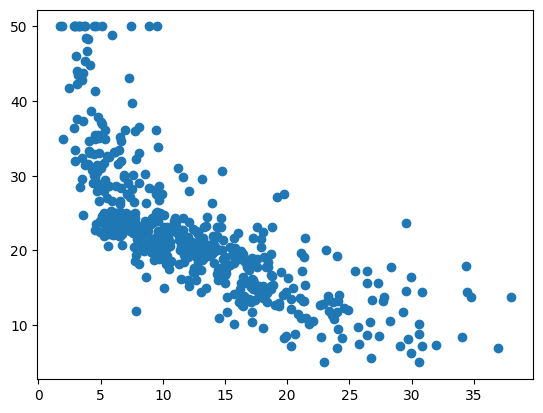

In [ ]:
plt.scatter(data[:, -1], target);

В **PyTorch** есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

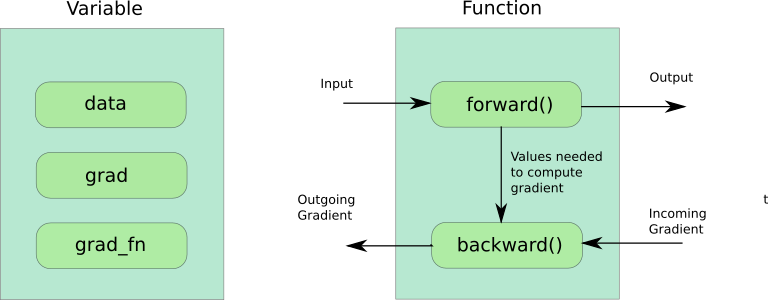

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True`.

In [ ]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(data[:, -1] / data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [ ]:
x.size(), y.size()

(torch.Size([506]), torch.Size([506]))

In [ ]:
y_pred = w * x + b
loss = torch.mean((y_pred - y) ** 2)
loss.backward()

In [ ]:
# сделали операции и посчитали градиенты, появилось значение соответствующих полей
assert w.grad is not None
assert b.grad is not None

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-12.2111])
dL/db = tensor([-44.4603])


Для доступа к значениям в тензоре используйте атрибут `.data`:

In [ ]:
w.data, w.grad

(tensor([0.8208]), tensor([-12.2111]))

In [ ]:
w

tensor([0.8208], requires_grad=True)

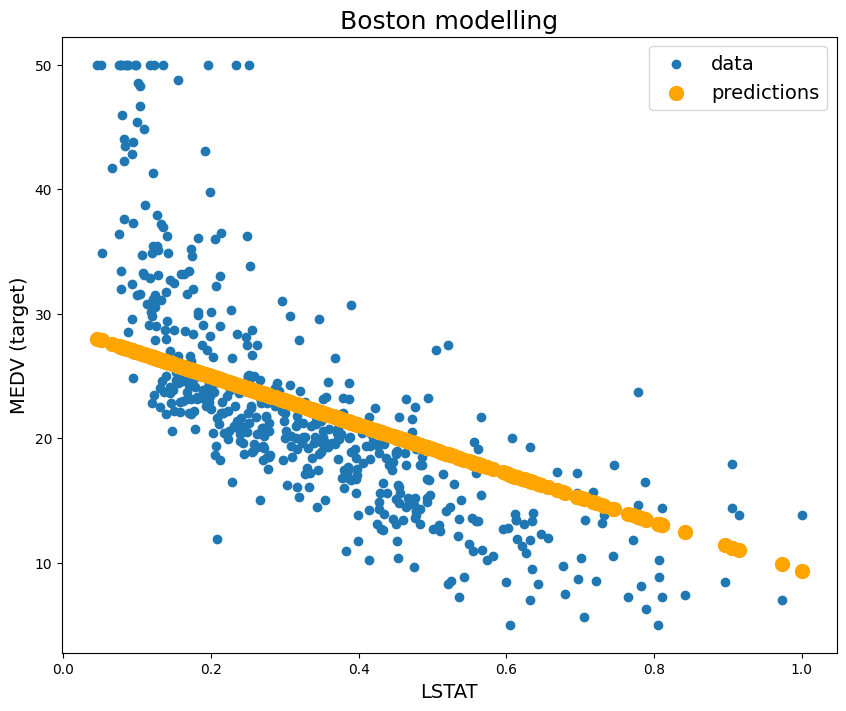

loss =  48.187424


In [ ]:
from IPython.display import clear_output

for i in range(300):
    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad
    b.data -= 0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(
            x.data.numpy(),
            y_pred.data.numpy(),
            color="orange",
            linewidth=5,
            label="predictions",
        )
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break

### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в **PyTorch**, нужно освоить три вещи:

1. Как формировать батчи и подавать их на вход сети
2. Как задать архитектуру сети
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы иметь возможность итерироваться по данным и применять к ним преобразования (например, аугментации, о которых вы узнаете позже), нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

У такого класса **должно быть** три метода:

* `__init__` — создаёт поля класса (например, путь к папке с файлами с тренировочными объектами)
* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — по индексу возвращает семпл и таргет к нему


Давайте напишем такой сами, в качестве данных используя рандомные значения.

In [6]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {
            "sample": torch.tensor(self.x[idx, :], dtype=torch.float),
            "target": self.y[idx],
        }

In [7]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [8]:
our_dataset = RandomDataset(x, y)

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [9]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [10]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.9106, 0.0729, 0.5801, 0.7610, 0.0781],
        [0.3389, 0.7960, 0.5499, 0.3560, 0.2528],
        [0.2555, 0.1041, 0.9203, 0.3810, 0.4698],
        [0.1941, 0.0935, 0.3624, 0.7970, 0.3322]])
Target:
tensor([0.0242, 0.0147, 0.4292, 0.6527], dtype=torch.float64)


**Как сделать нейросеть**

Для того, чтобы в high-level **PyTorch** создавать нейросети, используется модуль `torch.nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [11]:
model = nn.Sequential()  # создаем пустую модель, в которую будем добавлять слои
model.add_module(
    "l1", nn.Linear(5, 30)
)  # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module("l2", nn.ReLU())  # добавили функцию активации
model.add_module(
    "l3", nn.Linear(30, 1)
)  # добавили слой с 3-мя нейронами на вход и 5-ю на выход

# альтернативный способ
another_model = nn.Sequential(nn.Linear(5, 30), nn.ReLU(), nn.Linear(30, 1))

In [12]:
y_pred = model(batch["sample"])  # получили предсказания модели

In [13]:
y_pred

tensor([[-0.0845],
        [-0.0697],
        [-0.1702],
        [-0.0363]], grad_fn=<AddmmBackward0>)

**Как написать цикл обучения и отслеживать метрики**

Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [15]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/", train=False, download=True, transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=False, num_workers=1
)

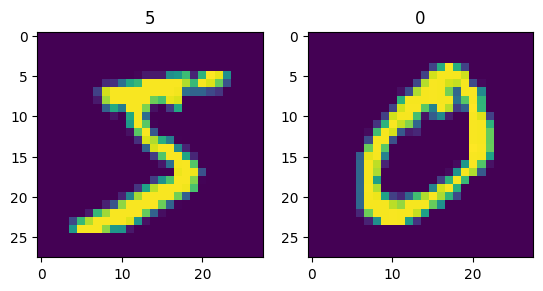

In [16]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [9]:
model = nn.Sequential(
    nn.Flatten(),  # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(
        28 * 28, 128
    ),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),  # нелинейность
    nn.Linear(
        128, 10
    ),  # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

Веса моделей хранятся в виде матриц и выглядят так:

In [19]:
[x for x in model.named_parameters()]

[('1.weight',
  Parameter containing:
  tensor([[-1.8554e-02,  2.9714e-02,  6.8109e-03,  ...,  3.5599e-02,
            3.0208e-02,  3.8785e-03],
          [-2.1388e-02,  7.5195e-03, -9.6259e-03,  ...,  3.2152e-02,
           -1.9023e-02,  2.0501e-02],
          [ 2.0461e-02,  2.3404e-02,  2.9899e-03,  ..., -3.0713e-02,
           -3.2685e-02, -7.0043e-03],
          ...,
          [ 3.5431e-02,  1.1419e-02,  7.4463e-06,  ...,  2.5310e-02,
            2.1489e-02, -1.5973e-02],
          [ 2.0078e-02,  3.2275e-03,  1.7425e-03,  ..., -1.5855e-02,
            2.6519e-02, -1.0979e-02],
          [ 1.2995e-02, -1.9991e-02, -2.7422e-02,  ..., -4.5830e-03,
           -5.1080e-03,  3.3702e-02]], requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-6.0388e-03, -1.7256e-02, -1.5057e-02, -3.6551e-03,  3.1240e-02,
          -1.6258e-02,  9.6268e-03, -1.9015e-02, -2.0220e-02,  1.3390e-02,
           2.4720e-02, -2.8674e-02,  1.4166e-02,  2.1177e-03,  2.8085e-02,
           8.6685e-03

Вместо того, чтобы каждый раз самим рисовать графики в `matplotlib`, мы будем _красиво_ трекать метрики в полуавтоматическом режиме в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся (это того стоит).

Note. Помимо этого инструмента есть другие альтернативы: Tensorboard (очень минималистичный, работает локально), MLFlow (менее красивый, но опенсорсный), Neptune (примерно как W&B).

In [20]:
!pip install wandb --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 27.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.1 MB/s eta 0:00:00


In [5]:
import wandb

In [1]:
# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
!wandb login
#wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
Aborted!


In [3]:
! wandb login 0d3173a0f8e387f7d646b4a30300d0f6818dc985

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [10]:
# инициализируем проект
wandb.init(project="pytorch-demo")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model);

Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

Одним из основных преимуществ PyTorch является возможность использования GPU-ускорителей на CUDA-совместимых графических процессорах Nvidia Compute Unified Device Architecture (CUDA) и Apple Metal Performance Shaders (MPS). До сих пор все, что мы делали, было на процессоре.

Во-первых, мы должны проверить, доступен ли графический процессор, с помощью метода ```is_available()```. Если у вас не установлен CUDA-совместимый графический процессор и драйверы CUDA, то после исполнения ячейки ниже в качестве девайса будет выступать CPU.

In [11]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

Как только мы определили, что один или несколько графических процессоров доступны, нам нужно поместить наши данные туда, где графический процессор сможет их увидеть. Ваш процессор выполняет вычисления над данными в оперативной памяти вашего компьютера. К вашему графическому процессору подключена выделенная память. Всякий раз, когда вы хотите выполнить вычисление на устройстве, вы должны переместить все данные, необходимые для этого вычисления, в память, доступную этому устройству.

По умолчанию новые тензоры создаются на CPU, поэтому нам нужно указать, когда мы хотим создать наш тензор на графическом процессоре, с помощью необязательного аргумента устройства.

In [12]:
x = torch.rand(2, 2, device=device)
x

tensor([[0.8337, 0.7970],
        [0.5271, 0.7223]], device='cuda:0')

Чтобы выполнять вычисления с использованием двух или более тензоров, все тензоры должны находиться на одном устройстве.

Если у вас уже есть тензор, расположенный на одном устройстве, вы можете переместить его на другое с помощью метода ```to()```.
Перенесем созданную ранее модель на наш новый девайс.

In [13]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
)

In [16]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):  # берем батч из трейн лоадера
        y_pred = model(x_train.to(device))  # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train.to(device))  # считаем лосс
        loss.backward()  # считаем градиенты обратным проходом
        optimizer.step()  # обновляем параметры сети
        optimizer.zero_grad()  # обнуляем посчитанные градиенты параметров

    if epoch % 2 == 0:
        val_loss = []  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():  # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(
                val_dataloader
            ):  # берем батч из валидационного лоадера
                y_pred = model(x_val.to(device))  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val.to(device))  # считаем лосс
                val_loss.append(loss.cpu().numpy())  # добавляем в массив
                val_accuracy.extend(
                    (torch.argmax(y_pred, dim=-1) == y_val.to(device)).cpu().numpy().tolist()
                )

        # скидываем метрики на wandb и автоматом смотрим на графики
        wandb.log(
            {
                "mean val loss": np.mean(val_loss),
                "mean val accuracy": np.mean(val_accuracy),
            }
        )

        # печатаем метрики
        print(
            f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}"
        )

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.1303185522556305, accuracy: 0.9608


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.09486501663923264, accuracy: 0.9697


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.07113152742385864, accuracy: 0.979


### Дополнительные материалы

* [Хорошая книга про pytorch](https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)